# DonorsChoose
### Assignment-10: Apply K-means, Agglomerative,DBSCAN on Donors Choose dataset 
### abhipise2704@gmail.com_10

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

# 1 Data Preprocessing 

## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [0]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [0]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 19)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'price' 'quantity']


In [0]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

        price  quantity  
55660  725.05         4  
76127  213.03         8

In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 preprocessing of `Project_Grade_Category`

In [0]:
#https://www.kaggle.com/naveennagari/donorschoose-eda-and-tsne/notebook

cleaned_Grades=[]
for grade in tqdm(project_data['project_grade_category'].values):
    grade = grade.replace(' ', '_')
    grade = grade.replace('-', '_')
    cleaned_Grades.append(grade)
project_data['cleaned_Grades']=cleaned_Grades


project_data.drop(['project_grade_category'], axis=1, inplace=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 471195.09it/s]


In [0]:
project_data['cleaned_Grades'][:5]

55660    Grades_PreK_2
76127       Grades_3_5
51140    Grades_PreK_2
473      Grades_PreK_2
41558       Grades_3_5
Name: cleaned_Grades, dtype: object

## 1.4 preprocessing of `School State`

In [0]:
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
state__ = dict(my_counter)
sorted_state_dict = dict(sorted(state__.items(), key=lambda kv: kv[1]))

## 1.5 preprocessing of `Teacher Prefix`

In [0]:
#https://towardsdatascience.com/5-methods-to-remove-the-from-your-data-in-python-and-the-fastest-one-281489382455

project_data['teacher_prefix_clean']=project_data.teacher_prefix.str.replace('.','')


#https://stackoverflow.com/questions/23158447/convert-float-to-string-in-pandas

project_data['teacher_prefix_clean'] = project_data['teacher_prefix_clean'].astype(str)

from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix_clean'].values:
    my_counter.update(word.split())
    

teacher_dict = dict(my_counter)
sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))


project_data.drop(['teacher_prefix'], axis=1, inplace=True)

## 1.6 Text preprocessing of `essay`

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           CA   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df           UT   

                     Date                                 project_title  \
55660 2016-04-27 00:27:36  Engineering STEAM into the Primary Classroom   
76127 2016-04-27 00:31:25                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

        price  quantity clean_categories                 clean_subcategories  \
55660  725.05         4     Math_Science  AppliedSciences Health_LifeScience   
76127  213.03         8     SpecialNeeds                        SpecialNeeds   

      cleaned_Grades teacher_prefix_clean  \
55660  Grades_PreK_2                  Mrs   
76127     Grades_3_5                   Ms   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [0]:
#### Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[15000])
print("="*50)
print(project_data['essay'].values[40000])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [02:17<00:00, 794.55it/s]


In [0]:
# after preprocesing
project_data['preprocessed_essays']=preprocessed_essays

In [0]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           CA   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df           UT   

                     Date                                 project_title  \
55660 2016-04-27 00:27:36  Engineering STEAM into the Primary Classroom   
76127 2016-04-27 00:31:25                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  ...  \
55660  It is challenging to develop high quality scie...  ...   
76127  When my students are able to calm themselves d...  ...   

      teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                           53                    1   
76127                                            4                    1   

        price  quantity  clean_categories                 clean_subcategories  \
55660  725.05         4      Math_Science  AppliedSciences Health_LifeScience   
76127  213.03         8      SpecialNeeds                        SpecialNeeds   

      cleaned_Grades teacher_prefix_clean  \
55660  Grades_PreK_2                  Mrs   
76127     Grades_3_5                   Ms   

                                                   essay  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                     preprocessed_essays  
55660  fortunate enough use fairy tale stem kits clas...  
76127  imagine 8 9 years old third grade classroom se...  

[2 rows x 21 columns]

In [0]:
project_data['preprocessed_essays'][:10]


55660    fortunate enough use fairy tale stem kits clas...
76127    imagine 8 9 years old third grade classroom se...
51140    class 24 students comes diverse learners stude...
473      recently read article giving students choice l...
41558    students crave challenge eat obstacles breakfa...
29891    end school year routines run course students n...
81565    sitting still overrated makes sense opera medi...
79026    not enough read book write essay connect deepl...
23374    never society rapidly changed technology invad...
86551    remember first time saw star wars wall e robot...
Name: preprocessed_essays, dtype: object

<h2><font color='black'> 1.7 Text Preprocessing of `project_title`</font></h2>

In [0]:
# similarly you can preprocess the titles also

In [0]:
project_data['project_title'][:10]

55660         Engineering STEAM into the Primary Classroom
76127                              Sensory Tools for Focus
51140       Mobile Learning with a Mobile Listening Center
473                 Flexible Seating for Flexible Learning
41558               Going Deep: The Art of Inner Thinking!
29891                   Breakout Box to Ignite Engagement!
81565    Flexible Seating: An Environment to Help Kids ...
79026                21st Century Learning with Multimedia
23374                                    iPad for Learners
86551                      Dash and Dot Robotic Duo Needed
Name: project_title, dtype: object

In [0]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent_project_title = decontracted(project_data['project_title'].values[1000])
print(sent_project_title)
print("="*50)

Empowering Students Through Art:Learning About Then and Now


In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent_project_title = sent_project_title.replace('\\r', ' ')
sent_project_title = sent_project_title.replace('\\"', ' ')
sent_project_title = sent_project_title.replace('\\n', ' ')
print(sent_project_title)

Empowering Students Through Art:Learning About Then and Now


In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_project_title = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent_project_title)

first graders eager learn world around come school day full enthusiasm genuinely love learning diverse class includes students variety cultural economic backgrounds Many come homes parents not afford simply not know importance books important provide environment rich literature students learn love reading want students lifelong learners reading best way used magazines past kids absolutely LOVE topics high interest children always correspond real world issues important kids learn subscription also includes online resources videos printable worksheets skill based games materials expose students rigorous interesting nonfiction text spark curiosity world around topics allow teach nonfiction text standards using interesting materials always lead engaging discussions inspire students find additional information various topics nannan


In [0]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent_project_title = decontracted(sentance)
    sent_project_title = sent_project_title.replace('\\r', ' ')
    sent_project_title = sent_project_title.replace('\\"', ' ')
    sent_project_title = sent_project_title.replace('\\n', ' ')
    sent_project_title = re.sub('[^A-Za-z0-9]+', ' ', sent_project_title)
    # https://gist.github.com/sebleier/554280
    sent_project_title = ' '.join(e for e in sent_project_title.split() if e not in stopwords)
    preprocessed_project_title.append(sent_project_title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [00:07<00:00, 15417.85it/s]


In [0]:
preprocessed_project_title[1000]

'empowering students through art learning about then now'

In [0]:
project_data['preprocessed_project_title']=preprocessed_project_title

In [0]:
project_data['preprocessed_project_title'][:10]

55660                engineering steam primary classroom
76127                                sensory tools focus
51140            mobile learning mobile listening center
473                   flexible seating flexible learning
41558                  going deep the art inner thinking
29891                     breakout box ignite engagement
81565    flexible seating an environment help kids learn
79026                   21st century learning multimedia
23374                                      ipad learners
86551                        dash dot robotic duo needed
Name: preprocessed_project_title, dtype: object

<h2><font color='black'> 1.8 Sentiment Score of Essays </font></h2>

In [0]:
#https://www.youtube.com/watch?v=qTyj2R-wcks
#https://www.kaggle.com/rohit0812/logistic-regression-on-donor-s-choose/notebook
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
#https://github.com/varma1993/ML-Projects/blob/master/DonorsChoose/Logistic%20Regression/5_DonorsChoose_LR_final.ipynb
#http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

project_data['sentiment_score'] = 0
project_data['sentiment_score'] = project_data['sentiment_score'].astype(float)

sentiment_analyzer = SentimentIntensityAnalyzer()

for index in tqdm(project_data.index):
    project_data.at[index, 'sentiment_score'] = sentiment_analyzer.polarity_scores(project_data.at[index,'preprocessed_essays'])['compound']

print(project_data.head(2))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [06:51<00:00, 265.55it/s]


       Unnamed: 0       id                        teacher_id school_state  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           CA   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df           UT   

                     Date                                 project_title  \
55660 2016-04-27 00:27:36  Engineering STEAM into the Primary Classroom   
76127 2016-04-27 00:31:25                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   


<h2><font color='black'> 1.9 Number of Words in Essays </font></h2>

In [0]:
#https://stackoverflow.com/questions/54397096/how-to-do-word-count-on-pandas-dataframe

project_data['number_words_essays']=project_data['preprocessed_essays'].str.count(' ')+1

<h2><font color='black'> 1.10 Number of Words in Project Title </font></h2>

In [0]:
#https://stackoverflow.com/questions/54397096/how-to-do-word-count-on-pandas-dataframe

project_data['number_words_project_title'] = project_data['preprocessed_project_title'].str.count(' ')+1

# Assignment 10: Apply K-means, Agglomerative,DBSCAN on Donors Choose dataset 

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features.
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● As this is very computationally expensive, take <b>5k</b> datapoints only to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● Take <b>5k</b> datapoints only.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2.Clustering</h1>

## 2.1 Dividing into X(data) and y (label)

In [0]:
#https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd
#https://medium.com/@master_yi/importing-datasets-in-google-colab-c816fc654f97
# Code to read csv file into Colaboratory:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1o7LChf9VR09xtAFE00af7QJraZiY0RfL'

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('preprocessed_data.csv')  
data = pd.read_csv('preprocessed_data.csv',nrows=60000)
# Dataset is now stored in a Pandas Dataframe
data.shape

1o7LChf9VR09xtAFE00af7QJraZiY0RfL


(60000, 26)

In [0]:
#project_data.to_csv('preprocessed_data.csv')

In [0]:
#data= pd.read_csv('preprocessed_data.csv', nrows=10000) #10K data points 

##### 10K data points are considered 

In [0]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

Unnamed: 0  Unnamed: 0.1  ... number_words_project_title number_words_essays
0       55660          8393  ...                          4                 156

[1 rows x 25 columns]

 <h2> 2.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

__Trianing data points =46900<br>
Test data points =23100__

<h2>2.3 Make Data Model Ready: encoding numerical, categorical ,Text features</h2>

### 2.3.1 VECTORIZING TEXT DATA (ESSAYS ,PROJECT TITLES )

#### 2.3.1.1 BoW repsentation of  Essays into train ,test 

In [0]:
print("Before vectorizations")

print("X_train shape:",X_train.shape,", y_train shape:", y_train.shape)
print("X_test shape:",X_test.shape, ", y_test shape:",y_test.shape)


print("="*100)

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)#unigram, bigram are used 


vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data
X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'].values)


X_test_essay_bow = vectorizer.transform(X_test['preprocessed_essays'].values)


print("After vectorizations")
print("X_train_essay_bow shape:",X_train_essay_bow.shape,", y_train shape:", y_train.shape)

print("X_test_essay_bow shape:",X_test_essay_bow.shape,", y_test shape:", y_test.shape)

print("="*100)


Before vectorizations
X_train shape: (6700, 25) , y_train shape: (6700,)
X_test shape: (3300, 25) , y_test shape: (3300,)
After vectorizations
X_train_essay_bow shape: (6700, 5000) , y_train shape: (6700,)
X_test_essay_bow shape: (3300, 5000) , y_test shape: (3300,)


#### 2.3.1.2 BoW representation of  Preprocessed Project Title into train ,test (BOW)

In [0]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_project_title'].values) # fit has to happen only on train data

X_train_project_title_bow = vectorizer.transform(X_train['preprocessed_project_title'].values)
X_test_project_title_bow = vectorizer.transform(X_test['preprocessed_project_title'].values)

print("After vectorizations")
print("X_train_project_title_bow shape:",X_train_project_title_bow.shape,", y_train.shape:", y_train.shape)
print("X_test_project_title_bow.shape:",X_test_project_title_bow.shape, ", y_test.shape:",y_test.shape)
print("="*100)

(6700, 25) (6700,)
(3300, 25) (3300,)
After vectorizations
X_train_project_title_bow shape: (6700, 615) , y_train.shape: (6700,)
X_test_project_title_bow.shape: (3300, 615) , y_test.shape: (3300,)


#### 2.3.1.3  TFIDF representation of  Preprocessed Essays into train ,test

##https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

##https://medium.com/swlh/truncated-singular-value-decomposition-svd-using-amazon-food-reviews-891d97af5d8d

from sklearn.decomposition import TruncatedSVD

X_train_essay_tfidf_3000=X_train_essay_tfidf[:3000]#only 3000 datapoints are considered to avoid memory error 


# Program to find the optimal number of components for Truncated SVD
diff_dimension = [100,500,1000,1500,2000,2500,3000]#,3500] # list containing different values of components
variance = [] # explained variance ratio for each component of Truncated SVD
for i in tqdm(diff_dimension):
    svd = TruncatedSVD(n_components=i,n_iter=2)#number of iterations set to 2 for speed up the algorithm 
    svd.fit(X_train_essay_tfidf_3000)
    variance.append(svd.explained_variance_ratio_.sum())
    print("Number of Dimesions(components) = %r and explained variance = %r"%(i,svd.explained_variance_ratio_.sum()))

    

#program to plot the variance vs number of dimensions(elbow method to determine optimal dimensions that will preserve max variance)    
plt.figure(figsize=(15,12))    
plt.plot(diff_dimension, variance)
plt.xlabel('Number of Dimensions ',fontsize=18)
plt.ylabel('Varience',fontsize=18 )
plt.title("Elbow Method Plot of Number of Dimesnions(components) vs explained variance",fontsize=20)
plt.grid()
plt.show()




In [0]:
print("Before vectorizations")

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

print("="*100)


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['preprocessed_essays'].values)

feature_names_tfidf=[]

X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)


print("After vectorizations")
print("X_train_essay_tfidf shape:",X_train_essay_tfidf.shape,", y_train.shape:", y_train.shape)
print("X_test_essay_tfidf shape:",X_test_essay_tfidf.shape,", y_test shape:", y_test.shape)
print("="*100)


Before vectorizations
(40200, 25) (40200,)
(19800, 25) (19800,)
After vectorizations
X_train_essay_tfidf shape: (40200, 81212) , y_train.shape: (40200,)
X_test_essay_tfidf shape: (19800, 81212) , y_test shape: (19800,)


dimensions that preserve 0.95 variance are 3600 

print("Before vectorizations")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


svd = TruncatedSVD(n_components=2000,n_iter=1)
X_train_tfidf_svd=svd.fit_transform(X_train_essay_tfidf)

X_test_tfidf_svd=svd.transform(X_test_essay_tfidf)



print("="*100)
print("After vectorizations")
print("Shape of Matrix X_train_tfidf_svd",X_train_tfidf_svd.shape, " ,Shape of Matrix y_train",y_train.shape )
print("Shape of Matrix X_test_tfidf_svd ",X_test_tfidf_svd.shape," ,Shape of matrix y_test ",y_test.shape)

#### 2.3.1.4  TFIDF representation of  Preprocessed Project Title into train ,test 

In [0]:
print("Before vectorizations")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['preprocessed_project_title'].values)


X_train_project_title_tfidf = vectorizer.transform(X_train['preprocessed_project_title'].values)
X_test_project_title_tfidf = vectorizer.transform(X_test['preprocessed_project_title'].values)


print("After vectorizations")
print("X_train_project_title_tfidf shape:",X_train_project_title_tfidf.shape, ", y_train shape:",y_train.shape)
print("X_test_project_title_tfidf shape:",X_test_project_title_tfidf.shape, ", y_test.shape:",y_test.shape)
print("="*100)

Before vectorizations
(40200, 25) (40200,)
(19800, 25) (19800,)
After vectorizations
X_train_project_title_tfidf shape: (40200, 3147) , y_train shape: (40200,)
X_test_project_title_tfidf shape: (19800, 3147) , y_test.shape: (19800,)


#### 2.3.1.5   AVG w2v representation of  Preprocessed Essays into train ,test 

In [0]:
#https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd
#https://medium.com/@master_yi/importing-datasets-in-google-colab-c816fc654f97
# Code to read csv file into Colaboratory:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1nU8ierrTDxSc-RO9-rqvFePdScAmNspH'

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('glove_vectors')  


1nU8ierrTDxSc-RO9-rqvFePdScAmNspH


In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
X_train_essays_avg_w2v_ = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_essays_avg_w2v_.append(vector)

print(len(X_train_essays_avg_w2v_))
print(len(X_train_essays_avg_w2v_[0]))
#X_train_essays_avg_w2v_

100%|██████████| 6700/6700 [00:01<00:00, 3819.94it/s]

6700
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
X_test_essays_avg_w2v_ = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essays_avg_w2v_.append(vector)

print(len(X_test_essays_avg_w2v_))
print(len(X_test_essays_avg_w2v_[0]))


100%|██████████| 3300/3300 [00:00<00:00, 3888.58it/s]

3300
300


#### 2.3.1.6    AVG w2v representation of  Preprocessed Project Title into train ,test

In [0]:
# average Word2Vec
# compute average word2vec for each review.
X_train_project_title_avg_w2v_ = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_project_title_avg_w2v_.append(vector)

print(len(X_train_project_title_avg_w2v_))
print(len(X_train_project_title_avg_w2v_[0]))

100%|██████████| 6700/6700 [00:00<00:00, 74015.31it/s]

6700
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
X_test_project_title_avg_w2v_ = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_project_title_avg_w2v_.append(vector)

print(len(X_test_project_title_avg_w2v_))
print(len(X_test_project_title_avg_w2v_[0]))

100%|██████████| 3300/3300 [00:00<00:00, 71836.30it/s]

3300
300


#### 2.3.1.7   TFIDF w2v representation of  Preprocessed Essays into train ,test 

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
X_train_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_essays_tfidf_w2v_vectors.append(vector)

print(len(X_train_essays_tfidf_w2v_vectors))
print(len(X_train_essays_tfidf_w2v_vectors[0]))

100%|██████████| 6700/6700 [00:11<00:00, 563.22it/s]

6700
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
X_test_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_essays_tfidf_w2v_vectors.append(vector)

print(len(X_test_essays_tfidf_w2v_vectors))
print(len(X_test_essays_tfidf_w2v_vectors[0]))

100%|██████████| 3300/3300 [00:05<00:00, 578.84it/s]

3300
300


#### 2.3.1.8     TFIDF w2v representation of  Preprocessed Project Titles into train ,test  

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
X_train_project_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_project_title_tfidf_w2v_vectors.append(vector)

print(len(X_train_project_title_tfidf_w2v_vectors))
print(len(X_train_project_title_tfidf_w2v_vectors[0]))

100%|██████████| 6700/6700 [00:00<00:00, 24155.73it/s]

6700
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
X_test_project_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_project_title_tfidf_w2v_vectors.append(vector)

print(len(X_test_project_title_tfidf_w2v_vectors))
print(len(X_test_project_title_tfidf_w2v_vectors[0]))

100%|██████████| 3300/3300 [00:00<00:00, 27761.92it/s]

3300
300


we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 2.3.2 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

#### 2.3.2.1 One Hot Encoding Representation of Categories for train test 

In [0]:
##https://www.appliedaicourse.com/course/11/Applied-Machine-learning-course


# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=False, binary=True)

X_train_categories_one_hot = vectorizer.fit_transform(X_train['clean_categories'].values)#fit to only training dataset 
print(vectorizer.get_feature_names())
print("="*100)
print("Shape of matrix X_train_categories_one_hot after one hot encodig ",X_train_categories_one_hot.shape)


X_test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)
print("Shape of matrix X_test_categories_one_hot  after one hot encodig ",X_test_categories_one_hot.shape)

['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']
Shape of matrix X_train_categories_one_hot after one hot encodig  (40200, 9)
Shape of matrix X_test_categories_one_hot  after one hot encodig  (19800, 9)


#### 2.3.2.2 One Hot Encoding Representation of Sub-Categories for train, test 

In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(lowercase=False, binary=True)

X_train_sub_categories_one_hot = vectorizer.fit_transform(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())

print("="*125)
print("Shape of matrix X_train_sub_categories_one_hot after one hot encodig ",X_train_sub_categories_one_hot.shape)

X_test_sub_categories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)
print("Shape of matrix X_test_sub_categories_one_hot after one hot encodig ",X_test_sub_categories_one_hot.shape)

['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']
Shape of matrix X_train_sub_categories_one_hot after one hot encodig  (40200, 30)
Shape of matrix X_test_sub_categories_one_hot after one hot encodig  (19800, 30)


#### 2.3.2.3 One Hot Encoding Representation of School State for train test

In [0]:
# we use count vectorizer to convert the values into one hot encoded features
#from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=False, binary=True)

X_train_school_state_one_hot=vectorizer.fit_transform(X_train['school_state'].values)
print(vectorizer.get_feature_names())

print("="*125)
print("Shape of matrix X_train_state after one hot encodig ",X_train_school_state_one_hot.shape)


X_test_school_state_one_hot = vectorizer.transform(X_test['school_state'].values)
print("Shape of matrix X_test_school_state_one_hot after one hot encodig ",X_test_school_state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix X_train_state after one hot encodig  (40200, 51)
Shape of matrix X_test_school_state_one_hot after one hot encodig  (19800, 51)


#### 2.3.2.4 One Hot Encoding Representation of Teacher Prefix for train test 

In [0]:
# we use count vectorizer to convert the values into one hot encoded features
#search term "np.nan is an invalid document, expected byte or unicode string."::https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document/39308809
# search tern "np.nan is an invalid document, expected byte or unicode string" ::https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document


vectorizer = CountVectorizer(lowercase=False, binary=True)

X_train_teacher_prefix_one_hot = vectorizer.fit_transform(X_train['teacher_prefix_clean'].values.astype('U'))
print(vectorizer.get_feature_names())
print("="*125)
print("Shape of X_train_teacher_prefix___one_hot matrix after one hot encodig ",X_train_teacher_prefix_one_hot.shape)


X_test_teacher_prefix_one_hot = vectorizer.transform(X_test['teacher_prefix_clean'].values.astype('U'))
print("Shape of X_test_teacher_prefix_one_hot matrix after one hot encodig ",X_test_teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'nan']
Shape of X_train_teacher_prefix___one_hot matrix after one hot encodig  (40200, 6)
Shape of X_test_teacher_prefix_one_hot matrix after one hot encodig  (19800, 6)


#### 2.3.2.5  One Hot Encoding Representation of Project Grades for train test

In [0]:
#reference::https://www.appliedaicourse.com/course/applied-ai-course-online
#https://www.kaggle.com/naveennagari/donorschoose-eda-and-tsne/notebook

vectorizer = CountVectorizer(lowercase=False, binary=True)

X_train_project_grade_one_hot = vectorizer.fit_transform(X_train['cleaned_Grades'])
print(vectorizer.get_feature_names())
print("="*125)
print("Shape of X_train_project_grade_one_hot matrix after one hot encodig for school states ",X_train_project_grade_one_hot.shape)



X_test_project_grade_one_hot = vectorizer.transform(X_test['cleaned_Grades'])
print("Shape of X_test_project_grade_one_hot matrix after one hot encodig for school states ",X_test_project_grade_one_hot.shape)

['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
Shape of X_train_project_grade_one_hot matrix after one hot encodig for school states  (40200, 4)
Shape of X_test_project_grade_one_hot matrix after one hot encodig for school states  (19800, 4)


### 2.3.4 Vectorizing Numerical Feature 

#### 2.3.4.1 Numerical Feature Price Standadize to Train Test

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))
#normalizer.fit(X_cv['price'].values.reshape(1,-1))
#normalizer.fit(X_train['price'].values.reshape(1,-1))

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

X_train_price_norm = normalizer.fit_transform(X_train['price'].values.reshape(1,-1))

X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)


print("After vectorizations")
print("="*100)
print("Shape of Matrix X_train_price_norm:",X_train_price_norm.shape,", Shape of Matrix y_train:", y_train.shape)
print("Shape of Matrix X_test_price_norm:",X_test_price_norm.shape, ", Shape of Matrix y_test:",y_test.shape)

After vectorizations
Shape of Matrix X_train_price_norm: (40200, 1) , Shape of Matrix y_train: (40200,)
Shape of Matrix X_test_price_norm: (19800, 1) , Shape of Matrix y_test: (19800,)


#### 2.3.4.2 Numerical Feature teacher_number_of_previously_posted_projects to Train Test 

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
#normalizer.fit(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#normalizer.fit(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
#normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm=X_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm=X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)

print("After vectorizations")
print("="*100)
print("Shape of Matrix X_train_teacher_number_of_previously_posted_projects_norm:",X_train_teacher_number_of_previously_posted_projects_norm.shape,"\nShape of Matrix y_train:", y_train.shape)
print("Shape of Matrix X_test_teacher_number_of_previously_posted_projects_norm:",X_test_teacher_number_of_previously_posted_projects_norm.shape,"\nShape of Matrix y_test:", y_test.shape)
print("="*100)


After vectorizations
Shape of Matrix X_train_teacher_number_of_previously_posted_projects_norm: (40200, 1) 
Shape of Matrix y_train: (40200,)
Shape of Matrix X_test_teacher_number_of_previously_posted_projects_norm: (19800, 1) 
Shape of Matrix y_test: (19800,)


#### 2.3.4.3 Numerical Feature Quantities to Train Test 

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
#normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity_norm = normalizer.fit_transform(X_train['quantity'].values.reshape(1,-1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))


X_train_quantity_norm=X_train_quantity_norm.reshape(-1,1)
X_test_quantity_norm=X_test_quantity_norm.reshape(-1,1)


print("After vectorizations")
print("="*100)
print("Shape of Matrix X_train_quantity_norm:",X_train_quantity_norm.shape,", Shape of Matrix y_train:", y_train.shape)
print("Shape of Matrix X_test_quantity_norm:",X_test_quantity_norm.shape, ", Shape of Matrix y_test:",y_test.shape)
print("="*100)




After vectorizations
Shape of Matrix X_train_quantity_norm: (40200, 1) , Shape of Matrix y_train: (40200,)
Shape of Matrix X_test_quantity_norm: (19800, 1) , Shape of Matrix y_test: (19800,)


#### 2.3.4.4 Normalization of  Feature Sentiment Score to Train Test

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
#normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_sentiment_score_norm = normalizer.fit_transform(X_train['sentiment_score'].values.reshape(1,-1))
X_test_sentiment_score_norm = normalizer.transform(X_test['sentiment_score'].values.reshape(1,-1))


X_train_sentiment_score_norm=X_train_sentiment_score_norm.reshape(-1,1)
X_test_sentiment_score_norm=X_test_sentiment_score_norm.reshape(-1,1)


print("After vectorizations")
print("="*100)
print("Shape of Matrix X_train_sentiment_score_norm:",X_train_sentiment_score_norm.shape,", Shape of Matrix y_train:", y_train.shape)
print("Shape of Matrix X_test_sentiment_score_norm:",X_test_sentiment_score_norm.shape, ", Shape of Matrix y_test:",y_test.shape)
print("="*100)


After vectorizations
Shape of Matrix X_train_sentiment_score_norm: (40200, 1) , Shape of Matrix y_train: (40200,)
Shape of Matrix X_test_sentiment_score_norm: (19800, 1) , Shape of Matrix y_test: (19800,)


#### 2.3.4.5 Normalization of  Number of words Essays Train Test

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
#normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_number_words_essays_norm = normalizer.fit_transform(X_train['number_words_essays'].values.reshape(1,-1))
X_test_number_words_essays_norm = normalizer.transform(X_test['number_words_essays'].values.reshape(1,-1))


X_train_number_words_essays_norm=X_train_number_words_essays_norm.reshape(-1,1)
X_test_number_words_essays_norm=X_test_number_words_essays_norm.reshape(-1,1)


print("After vectorizations")
print("="*100)
print("Shape of Matrix X_train_number_words_essays_norm:",X_train_number_words_essays_norm.shape,", Shape of Matrix y_train:", y_train.shape)
print("Shape of Matrix X_test_number_words_essays_norm:",X_test_number_words_essays_norm.shape, ", Shape of Matrix y_test:",y_test.shape)
print("="*100)


After vectorizations
Shape of Matrix X_train_number_words_essays_norm: (40200, 1) , Shape of Matrix y_train: (40200,)
Shape of Matrix X_test_number_words_essays_norm: (19800, 1) , Shape of Matrix y_test: (19800,)


#### 2.3.4.6 Normalization of  Number of words Project Title Train ,Test

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
#normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_number_words_project_title_norm = normalizer.fit_transform(X_train['number_words_project_title'].values.reshape(1,-1))
X_test_number_words_project_title_norm = normalizer.transform(X_test['number_words_project_title'].values.reshape(1,-1))


X_train_number_words_project_title_norm=X_train_number_words_project_title_norm.reshape(-1,1)
X_test_number_words_project_title_norm=X_test_number_words_project_title_norm.reshape(-1,1)


print("After vectorizations")
print("="*100)
print("Shape of Matrix X_train_number_words_project_title_norm:",X_train_number_words_project_title_norm.shape,", Shape of Matrix y_train:", y_train.shape)
print("Shape of Matrix X_test_number_words_project_title_norm:",X_test_number_words_project_title_norm.shape, ", Shape of Matrix y_test:",y_test.shape)
print("="*100)


After vectorizations
Shape of Matrix X_train_number_words_project_title_norm: (40200, 1) , Shape of Matrix y_train: (40200,)
Shape of Matrix X_test_number_words_project_title_norm: (19800, 1) , Shape of Matrix y_test: (19800,)


## 3 Applying  Kmeans Clustering TFIDF,<font color='red'> SET 1</font>

### 3.1 Merging all the above features for TFIDF

In [0]:
from scipy.sparse import hstack


X_tr_tfidf=hstack((X_train_essay_tfidf,X_train_project_title_tfidf,X_train_categories_one_hot,X_train_sub_categories_one_hot,
                X_train_project_grade_one_hot,X_train_school_state_one_hot,
                 X_train_teacher_prefix_one_hot,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,X_train_quantity_norm)).tocsr()


#X_test_tfidf=hstack((X_test_essay_tfidf,X_test_project_title_tfidf,X_test_categories_one_hot,X_test_sub_categories_one_hot,
 #               X_test_project_grade_one_hot,X_test_school_state_one_hot,
  #               X_test_teacher_prefix_one_hot,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,X_test_quantity_norm)).tocsr()


print("Final Data matrix")
print("="*100)
print("X_tr_tfidf shape:",X_tr_tfidf.shape,"y_train:", y_train.shape)
#print("X_test_tfidf shape:",X_test_tfidf.shape,"y_test:", y_test.shape)
print("="*100)


Final Data matrix
X_tr_tfidf shape: (20100, 6780) y_train: (20100,)


### 3.2 Feature selection with `SelectKBest` </h2>

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html


#Selection top 5000 feaures of TFIDF essays vectors 
from sklearn.feature_selection import SelectKBest, chi2

select=SelectKBest(chi2,k=5000)

select.fit(X_tr_tfidf,y_train)

X_tr_tfidf_5000=select.transform(X_tr_tfidf )

#X_test_tfidf_5000=select.transform(X_test_tfidf )

print("Final Data matrix after selecting top 5000 features ")
print("="*100)
print("X_tr_tfidf_5000 shape:",X_tr_tfidf_5000.shape)
#print("X_test_tfidf_5000 shape:",X_test_tfidf_5000.shape)
print("="*100)

Final Data matrix after selecting top 5000 features 
X_tr_tfidf_5000 shape: (20100, 5000)


### 3.3 Hyperparameter Tuning to find Out Best 'K' of K-means clustering on TFIDF set 1

100%|██████████| 14/14 [00:57<00:00,  4.11s/it]


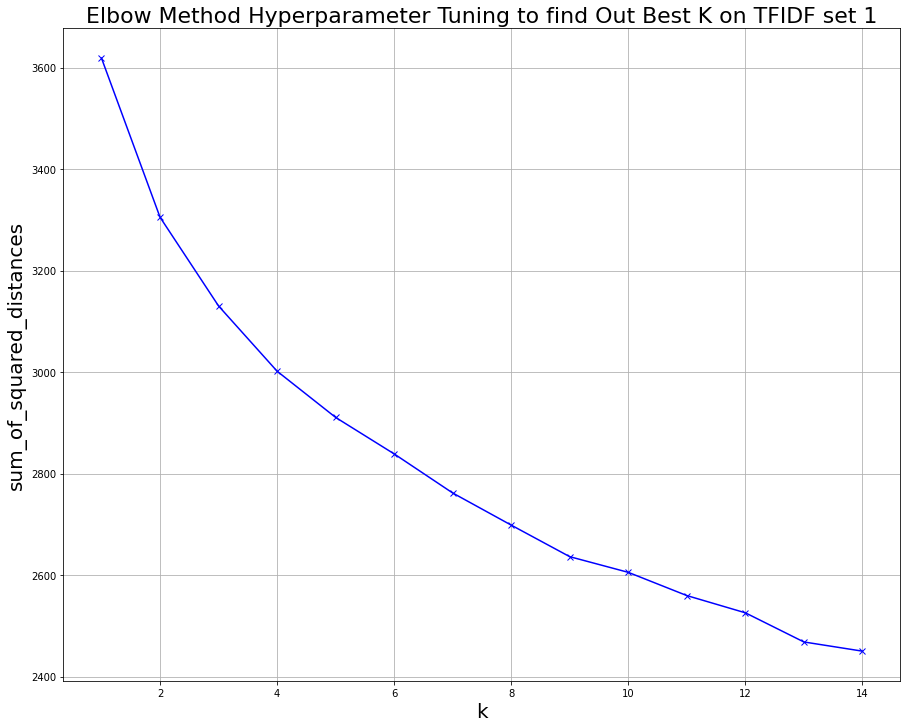

In [0]:
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

from sklearn.cluster import KMeans

sum_of_squared_distances = []
K_hyperparameter= range(1,15)
for i in tqdm(K_hyperparameter):
    km = KMeans(n_clusters=i,n_jobs=-1)
    km = km.fit(X_tr_tfidf_5000 )
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(15,12))    
plt.grid()
plt.plot(K_hyperparameter, sum_of_squared_distances, 'bx-')
plt.xlabel('k',fontsize=20)
plt.ylabel('sum_of_squared_distances',fontsize=20)
plt.title('Elbow Method Hyperparameter Tuning to find Out Best K on TFIDF set 1',fontsize=22)
plt.show()

<font color=blue>*__OBSERVATION:__*<br>
1.After obeserving graph we can take value of K=6 

### 3.4 Applying Kmeans clustering algorithm with best K 

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
kmeans=kmeans.fit(X_tr_tfidf_5000 )
y_means= kmeans.predict(X_tr_tfidf_5000 )
cluster_centers_ = kmeans.cluster_centers_
y_labels=kmeans.labels_

### 3.5 WordCloud Representation of Different Clusters from Kmeans Set 1

In [0]:
#https://github.com/dileepteja3/Clustering-on-Donors-choose/blob/master/dileep.teja3%40gmail.com_10.ipynb


essays = X_train['preprocessed_essays'].values
words_essays_datapoints=[]
cluster1_essays_words = ' '
cluster2_essays_words = ' '
cluster3_essays_words = ' '
cluster4_essays_words = ' '
cluster5_essays_words = ' '
cluster6_essays_words = ' '


for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        words_essays_datapoints.append(1)
        cluster1_essays_words+=essays[i]
        
    elif kmeans.labels_[i] == 1:
         words_essays_datapoints.append(1)
         cluster2_essays_words+=essays[i]

        
    elif kmeans.labels_[i] == 2:
         words_essays_datapoints.append(1)
         cluster3_essays_words+=essays[i]

    elif kmeans.labels_[i] == 3:
         words_essays_datapoints.append(1)
         cluster4_essays_words+=essays[i]


    elif kmeans.labels_[i] == 4:
         words_essays_datapoints.append(1)
         cluster5_essays_words+=essays[i]
     
    elif kmeans.labels_[i] == 5:
         words_essays_datapoints.append(1)
         cluster6_essays_words+=essays[i]
    
        
 


 #   elif kmeans.labels_[i] == 2:
  #      cluster3.append(essays[i])
   # elif  kmeans.labels_[i] == 3:
      #  cluster4.append(essays[i])
    #elif  kmeans.labels_[i] == 4:
     #   cluster5.append(essays[i])
    #elif  kmeans.labels_[i] == 5:
     #   cluster6.append(essays[i])

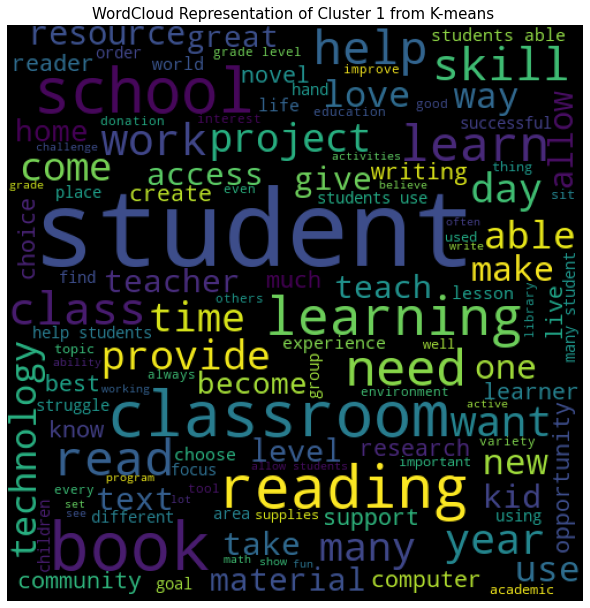

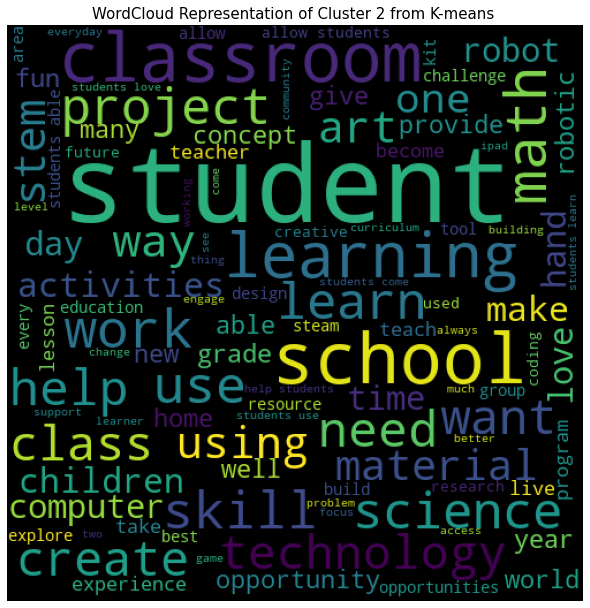

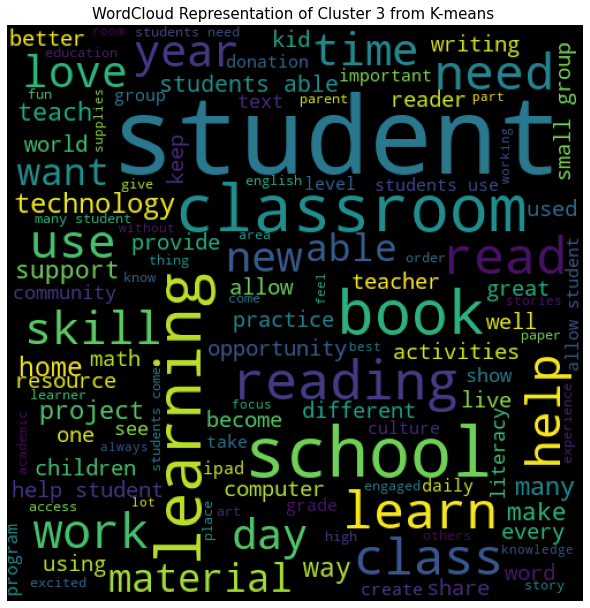

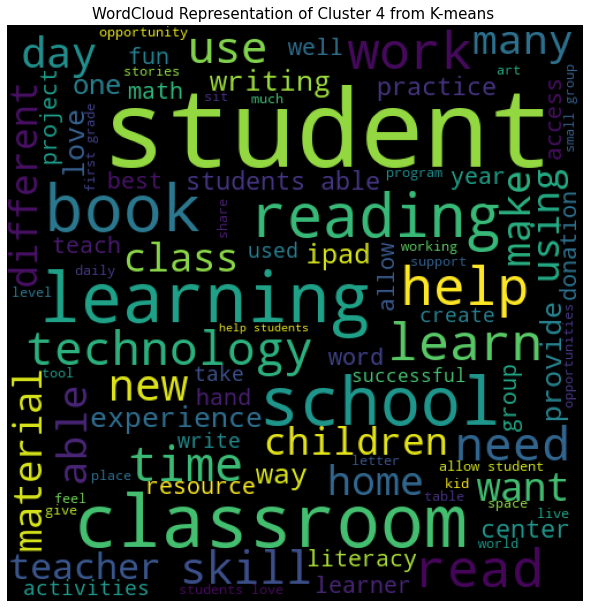

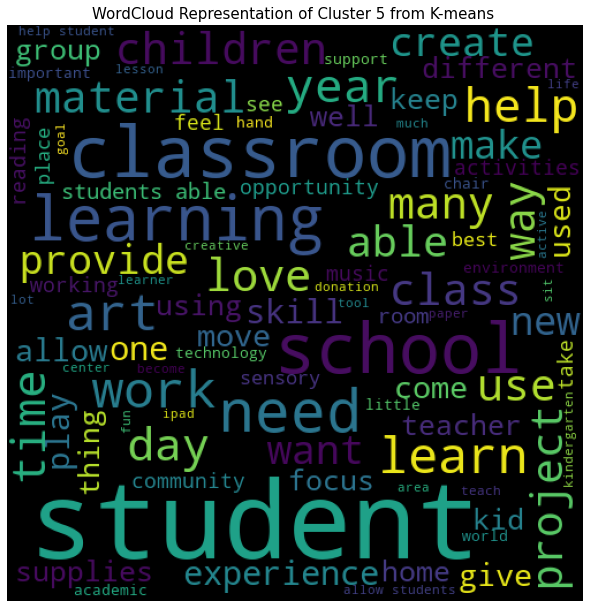

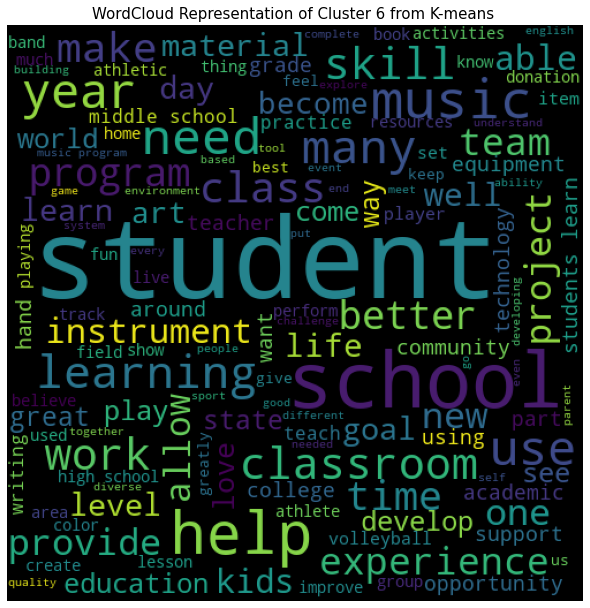

In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

print("="*90)
print("="*90)

from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster1_essays_words)
# plot the WordCloud image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud Representation of Cluster 1 from K-means ',fontsize=15)
plt.show()



print("="*90)
print("="*90)
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster2_essays_words)
# plot the WordCloud image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud Representation of Cluster 2 from K-means ',fontsize=15)
plt.show()



print("="*90)
print("="*90)
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster3_essays_words)
# plot the WordCloud image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud Representation of Cluster 3 from K-means ',fontsize=15)
plt.show()






#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster4_essays_words)
# plot the WordCloud image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud Representation of Cluster 4 from K-means ',fontsize=15)
plt.show()



print("="*90)
print("="*90)
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster5_essays_words)
# plot the WordCloud image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud Representation of Cluster 5 from K-means ',fontsize=15)
plt.show()



print("="*90)
print("="*90)
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster6_essays_words)
# plot the WordCloud image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud Representation of Cluster 6 from K-means ',fontsize=15)
plt.show()

### 3.6 Manual Representation of Different Clusters(Essays words) from Kmeans Set 1

In [0]:
print("="*90)
print("Cluster 1 Words from Essays:")
print(cluster1_essays_words[0:500])

print("="*90)
print("Cluster 2 Words from Essays:")
print(cluster2_essays_words[0:500])

print("="*90)
print("Cluster 3 Words from Essays:")
print(cluster3_essays_words[0:500])

print("="*90)
print("Cluster 4 Words from Essays:")
print(cluster4_essays_words[0:500])


print("="*90)
print("Cluster 5 Words from Essays:")
print(cluster5_essays_words[0:500])

Cluster 1 Words from Essays:
 begin speech practice students greet make goals achieved cooperative team environment important success students school serves 2 900 students culturally diverse low income population students drawn speech debate opportunity heard students learn not academic skills life skills speech debate students dedicate exceptional amount time creating reflecting perfecting performing pieces give afternoons saturdays apart activity truly makes students extraordinary people students using resources expand pe
Cluster 2 Words from Essays:
 day teach class every grade never bored constant change developmental needs creative capacities encounter hourly project help fund 5th grade students verge middle school grown dreams long way go children living heart mississippi delta face challenges big small come school eager learn 5th graders much express photography freeing medium explore world place students learn photography elements principles design given tools necessary tell co

## 4 Applying  Agglomerative  Clustering TFIDF,<font color='red'> SET 2</font>

### 4.1 Merging all the above features for TFIDF

In [0]:
from scipy.sparse import hstack


X_tr_tfidf=hstack((X_train_essay_tfidf,X_train_project_title_tfidf,X_train_categories_one_hot,X_train_sub_categories_one_hot,
                X_train_project_grade_one_hot,X_train_school_state_one_hot,
                 X_train_teacher_prefix_one_hot,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,X_train_quantity_norm)).tocsr()


#X_test_tfidf=hstack((X_test_essay_tfidf,X_test_project_title_tfidf,X_test_categories_one_hot,X_test_sub_categories_one_hot,
 #               X_test_project_grade_one_hot,X_test_school_state_one_hot,
  #               X_test_teacher_prefix_one_hot,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,X_test_quantity_norm)).tocsr()


print("Final Data matrix")
print("="*100)
print("X_tr_tfidf shape:",X_tr_tfidf.shape,"y_train:", y_train.shape)
#print("X_test_tfidf shape:",X_test_tfidf.shape,"y_test:", y_test.shape)
print("="*100)


Final Data matrix
X_tr_tfidf shape: (670, 1508) y_train: (670,)


### 4.2 Feature selection with `SelectKBest` and considering only 5000 points </h2>

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html


#Selection top 5000 feaures of TFIDF essays vectors 
from sklearn.feature_selection import SelectKBest, chi2

select=SelectKBest(chi2,k=1000)

select.fit(X_tr_tfidf,y_train)

X_tr_tfidf_5000=select.transform(X_tr_tfidf )

#X_test_tfidf_5000=select.transform(X_test_tfidf )

print("Final Data matrix after selecting top 5000 features ")
print("="*100)
print("X_tr_tfidf_5000 shape:",X_tr_tfidf_5000.shape)
#print("X_test_tfidf_5000 shape:",X_test_tfidf_5000.shape)
print("="*100)

Final Data matrix after selecting top 5000 features 
X_tr_tfidf_5000 shape: (670, 1000)


In [0]:
X_tr_tfidf_5000=X_tr_tfidf_5000[:5000]

print("Final Data matrix after selecting top 5000 features & considering only 5000 points  ")
print("="*100)
print("X_tr_tfidf_5000 shape:",X_tr_tfidf_5000.shape)
#print("X_test_tfidf_5000 shape:",X_test_tfidf_5000.shape)
print("="*100)

Final Data matrix after selecting top 5000 features & considering only 5000 points  
X_tr_tfidf_5000 shape: (670, 1000)


### 4.3 Agglomerative Clustering on TFIDF set 2 (number of clusters=2) </h2>

In [0]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
agg=agg.fit(X_tr_tfidf_5000.toarray())
#y_agg= agg.predict(X_tr_tfidf_5000 .toarray())
#cluster_centers_ = agg.cluster_centers_
y_labels=agg.labels_

### 4.4 WordCloud Representation of Essays After Applying Agglomerative Clustering on TFIDF set 2 (number of clusters=2) </h2>

In [0]:
#https://github.com/dileepteja3/Clustering-on-Donors-choose/blob/master/dileep.teja3%40gmail.com_10.ipynb

essays = X_train['preprocessed_essays'].values
words_essays_datapoints=[]

cluster1_essays_words_agg = ' '
cluster2_essays_words_agg = ' '

for i in range(agg.labels_.shape[0]):
    if agg.labels_[i] == 0:
        words_essays_datapoints.append(1)
        cluster1_essays_words_agg+=essays[i]
        
    elif agg.labels_[i] == 1:
         words_essays_datapoints.append(1)
         cluster2_essays_words_agg+=essays[i]
        
        
        #   elif kmeans.labels_[i] == 2:
  #      cluster3.append(essays[i])
   # elif  kmeans.labels_[i] == 3:
      #  cluster4.append(essays[i])
    #elif  kmeans.labels_[i] == 4:
     #   cluster5.append(essays[i])
    #elif  kmeans.labels_[i] == 5:
     #   cluster6.append(essays[i])

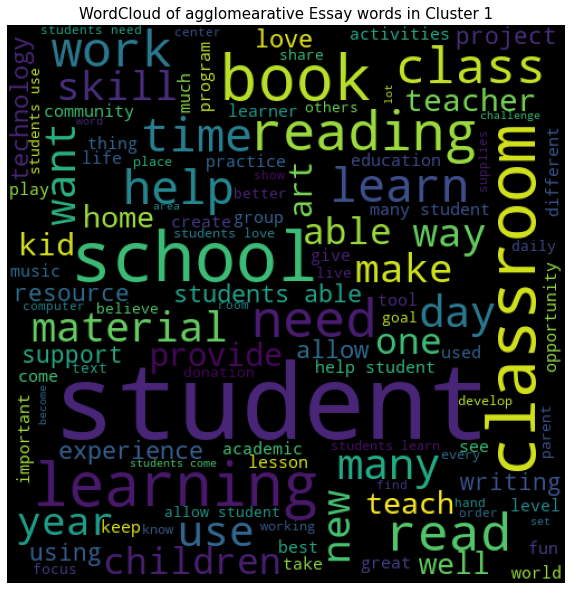

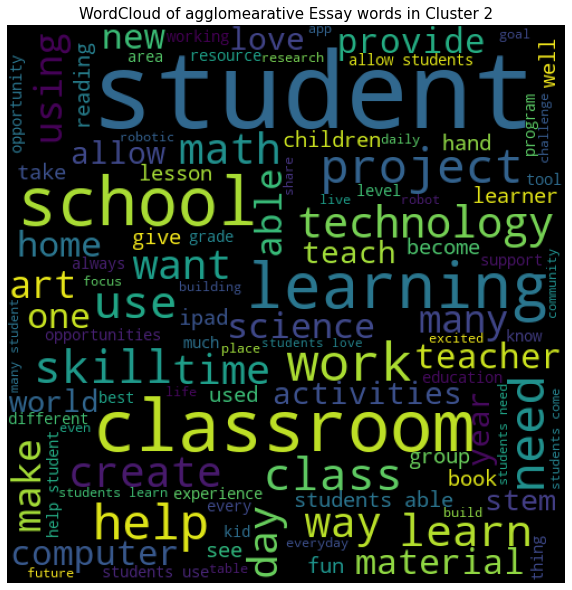

In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster1_essays_words_agg)
# plot the WordCloud image

plt.figure(figsize = (8, 8))
print("="*90)
print("="*90)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('WordCloud of agglomearative Essay words in Cluster 1', fontsize=15)

plt.tight_layout(pad = 0)
plt.show()



#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster2_essays_words_agg)
# plot the WordCloud image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.title('WordCloud of agglomearative Essay words in Cluster 2', fontsize=15)
print("="*90)
print("="*90)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#https://stackoverflow.com/questions/34342155/how-to-pickle-or-store-jupyter-ipython-notebook-session-for-later

import nltk
nltk.download('stopwords')

import dill
dill.dump_session('notebook_env_DBSCAN.db')

### 4.5 Manual Representation of Essays Words After Applying Agglomerative Clustering on TFIDF set 2 (number of clusters=2) </h2>

In [0]:
print("="*90)
print("Cluster 1 Words Agglomearative Clustering from Essays:")
print(cluster1_essays_words_agg[0:500])

print("="*90)
print("Cluster 1 Words Agglomearative Clustering from Essays:")
print(cluster2_essays_words_agg[0:500])



Cluster 1 Words Agglomearative Clustering from Essays:
 begin speech practice students greet make goals achieved cooperative team environment important success students school serves 2 900 students culturally diverse low income population students drawn speech debate opportunity heard students learn not academic skills life skills speech debate students dedicate exceptional amount time creating reflecting perfecting performing pieces give afternoons saturdays apart activity truly makes students extraordinary people students using resources expand pe
Cluster 1 Words Agglomearative Clustering from Essays:
 day teach class every grade never bored constant change developmental needs creative capacities encounter hourly project help fund 5th grade students verge middle school grown dreams long way go children living heart mississippi delta face challenges big small come school eager learn 5th graders much express photography freeing medium explore world place students learn photography elem

### 4.6 Agglomerative Clustering on TFIDF set 2 (number of clusters=5) </h2>

In [0]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5)
agg=agg.fit(X_tr_tfidf_5000.toarray())
#y_agg= agg.predict(X_tr_tfidf_5000 .toarray())
#cluster_centers_ = agg.cluster_centers_
y_labels=agg.labels_

### 4.7 WordCloud Representation of Essays After Applying Agglomerative Clustering on TFIDF set 2 (number of clusters=5) </h2>

In [0]:
#https://github.com/dileepteja3/Clustering-on-Donors-choose/blob/master/dileep.teja3%40gmail.com_10.ipynb

essays = X_train['preprocessed_essays'].values
words_essays_datapoints=[]

cluster1_essays_words_agg = ' '
cluster2_essays_words_agg = ' '
cluster3_essays_words_agg = ' '
cluster4_essays_words_agg = ' '
cluster5_essays_words_agg = ' '

for i in range(agg.labels_.shape[0]):
    if agg.labels_[i] == 0:
        words_essays_datapoints.append(1)
        cluster1_essays_words_agg+=essays[i]
    
    
    elif agg.labels_[i] == 1:
         words_essays_datapoints.append(1)
         cluster2_essays_words_agg+=essays[i]
        
    elif agg.labels_[i] == 2:
         words_essays_datapoints.append(1)
         cluster3_essays_words_agg+=essays[i]    
        
    elif agg.labels_[i] == 3:
         words_essays_datapoints.append(1)
         cluster4_essays_words_agg+=essays[i]    
    
    elif agg.labels_[i] == 4:
         words_essays_datapoints.append(1)
         cluster5_essays_words_agg+=essays[i]    
         

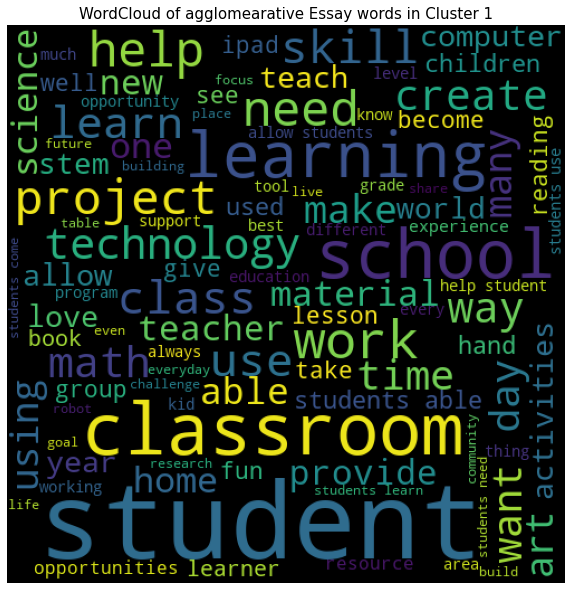

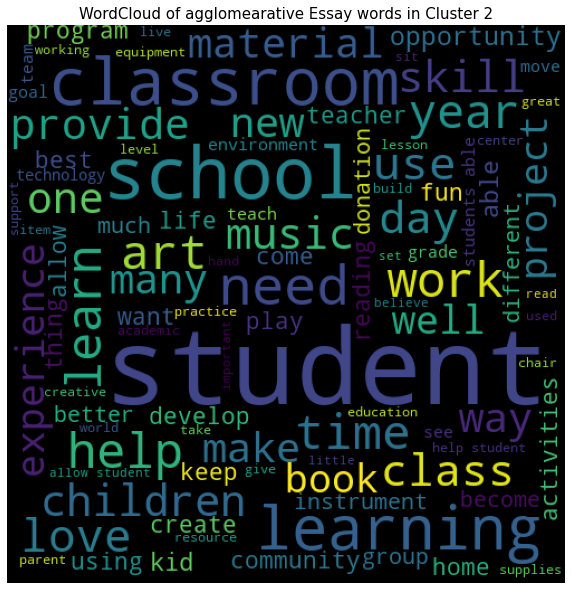

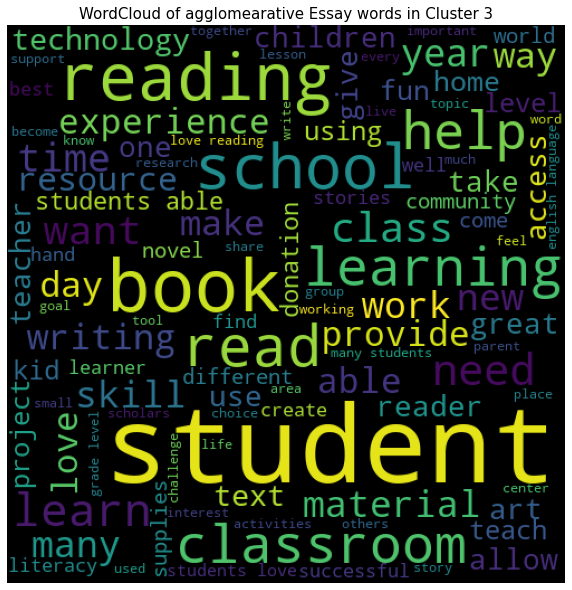

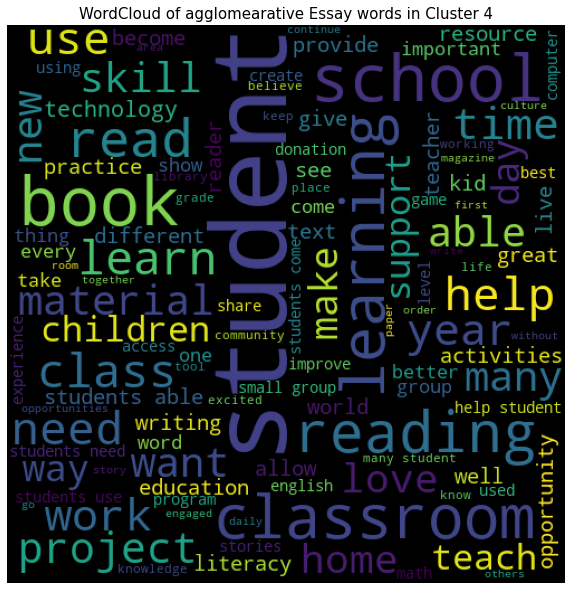

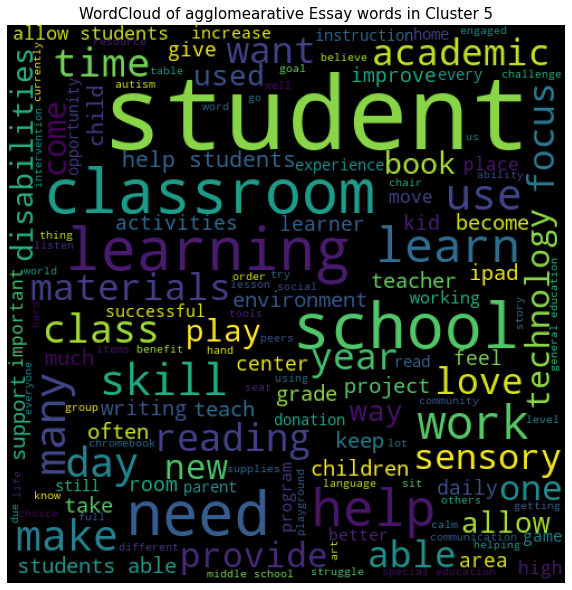

In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster1_essays_words_agg)
# plot the WordCloud image

plt.figure(figsize = (8, 8))
print("="*90)
print("="*90)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('WordCloud of agglomearative Essay words in Cluster 1', fontsize=15)

plt.tight_layout(pad = 0)
plt.show()



#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster2_essays_words_agg)
# plot the WordCloud image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.title('WordCloud of agglomearative Essay words in Cluster 2', fontsize=15)
print("="*90)
print("="*90)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster3_essays_words_agg)
# plot the WordCloud image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.title('WordCloud of agglomearative Essay words in Cluster 3', fontsize=15)
print("="*90)
print("="*90)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster4_essays_words_agg)
# plot the WordCloud image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.title('WordCloud of agglomearative Essay words in Cluster 4', fontsize=15)
print("="*90)
print("="*90)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster5_essays_words_agg)
# plot the WordCloud image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.title('WordCloud of agglomearative Essay words in Cluster 5', fontsize=15)
print("="*90)
print("="*90)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


print("="*90)
print("="*90)

### 4.8 Manual Representation of Essays Words After Applying Agglomerative Clustering on TFIDF set 2 (number of clusters=5) </h2>

In [0]:
print("="*90)
print("Cluster 1 Words Agglomeartive Clustering from Essays:")
print(cluster1_essays_words_agg[0:500])

print("="*90)
print("Cluster 2 Words Agglomeartive Clustering from Essays:")
print(cluster2_essays_words_agg[0:500])

print("="*90)
print("Cluster 3 Words Agglomeartive Clustering from Essays:")
print(cluster3_essays_words_agg[0:500])


Cluster 1 Words Agglomeartive Clustering from Essays:
 day teach class every grade never bored constant change developmental needs creative capacities encounter hourly project help fund 5th grade students verge middle school grown dreams long way go children living heart mississippi delta face challenges big small come school eager learn 5th graders much express photography freeing medium explore world place students learn photography elements principles design given tools necessary tell compelling story place people begin lessons photography devel
Cluster 2 Words Agglomeartive Clustering from Essays:
 remember sitting day hard classroom chairs finding difficult sit still pay attention well true today students current research indicates need move throughout day productivity health students need chairs students 7 8 years old eleven english learners two deaf hard hearing students three students adhd rest typical energetic children school title 1 school 70 receiving free reduced lunch wor

## 5 Applying  DBSCAN  Clustering TFIDF,<font color='red'> SET 3</font>

### 5.1 Merging all the above features for TFIDF

In [0]:
from scipy.sparse import hstack


X_tr_tfidf=hstack((X_train_essay_tfidf,X_train_project_title_tfidf,X_train_categories_one_hot,X_train_sub_categories_one_hot,
                X_train_project_grade_one_hot,X_train_school_state_one_hot,
                 X_train_teacher_prefix_one_hot,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,X_train_quantity_norm)).tocsr()


#X_test_tfidf=hstack((X_test_essay_tfidf,X_test_project_title_tfidf,X_test_categories_one_hot,X_test_sub_categories_one_hot,
 #               X_test_project_grade_one_hot,X_test_school_state_one_hot,
  #               X_test_teacher_prefix_one_hot,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,X_test_quantity_norm)).tocsr()


print("Final Data matrix")
print("="*100)
print("X_tr_tfidf shape:",X_tr_tfidf.shape,"y_train:", y_train.shape)
#print("X_test_tfidf shape:",X_test_tfidf.shape,"y_test:", y_test.shape)
print("="*100)


Final Data matrix
X_tr_tfidf shape: (40200, 84462) y_train: (40200,)


### 5.2 Feature selection with `SelectKBest` & considering only 5000 points </h2>

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html


#Selection top 5000 feaures of TFIDF essays vectors 
from sklearn.feature_selection import SelectKBest, chi2

select=SelectKBest(chi2,k=5000)

select.fit(X_tr_tfidf,y_train)

X_tr_tfidf_5000=select.transform(X_tr_tfidf )

#X_test_tfidf_5000=select.transform(X_test_tfidf )

print("Final Data matrix after selecting top 5000 features ")
print("="*100)
print("X_tr_tfidf_5000 shape:",X_tr_tfidf_5000.shape)
#print("X_test_tfidf_5000 shape:",X_test_tfidf_5000.shape)
print("="*100)

Final Data matrix after selecting top 5000 features 
X_tr_tfidf_5000 shape: (40200, 5000)


X_tr_tfidf_5000=X_tr_tfidf_5000[:5000]

print("Final Data matrix after selecting top 5000 features & considering only 5000 points  ")
print("="*100)
print("X_tr_tfidf_5000 shape:",X_tr_tfidf_5000.shape)
#print("X_test_tfidf_5000 shape:",X_test_tfidf_5000.shape)
print("="*100)

### 5.3 Find the best ‘eps’ using the elbow-knee method for DBSCAN on TFIDF set 3 

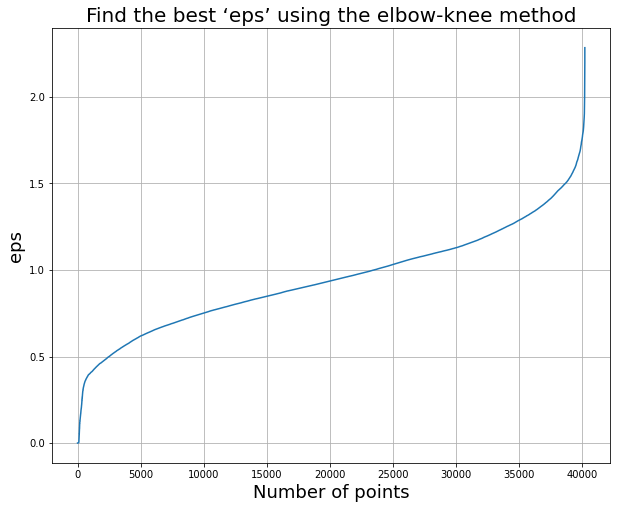

In [0]:
#https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
%matplotlib inline

import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X_tr_tfidf_5000 )
distances, indices = nbrs.kneighbors(X_tr_tfidf_5000 ) #getting distances from KNN algorithm 

distances = np.sort(distances, axis=0) #sorting distances 
distances = distances[:,1]
plt.figure(figsize = (10,8 ))
plt.plot(distances)
plt.title("Find the best ‘eps’ using the elbow-knee method",fontsize=20)

plt.ylabel("eps",fontsize=18)
plt.xlabel("Number of points",fontsize=18)
#plt.style.use('classic')
plt.grid()


### 5.4 DBSCAN on TFIDF set 3 with Best 'eps'

In [0]:
from sklearn.cluster import DBSCAN

DBSCAN = DBSCAN(eps=2.2,min_samples=10000,n_jobs=-1)
DBSCAN.fit(X_tr_tfidf_5000)

DBSCAN(algorithm='auto', eps=2.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10000, n_jobs=-1, p=None)

In [0]:
#https://stackoverflow.com/questions/39781262/find-the-location-that-occurs-most-in-every-cluster-in-dbscan
#"how to observe points from different clusters for dbscan::"-https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818

cluster_labels = DBSCAN.labels_
num_clusters = len(set(cluster_labels))-(1 if -1 in cluster_labels else 0) #no of clusters minus noise cluster, we get total no of clusters 
print("="*90)
print("="*90)
print("Number of Clusters after applying DBSCAN on TFIDF  :",num_clusters)
print("="*90)
print("="*90)

Number of Clusters after applying DBSCAN on TFIDF  : 1


In [0]:
#https://stackoverflow.com/questions/45313176/what-are-noisy-samples-in-scikits-dbscan-clustering-algorithm

noise_clusters=len(set(cluster_labels==-1))
if noise_clusters!=0:
   print("="*50)
   print("-"*50)
   print("Noise Cluster in DBSCAN=1" )
   print("-"*50)
   print("="*50)
   
else:
  print("="*50)
  print("-"*50)
  print("No Noise Cluster in DBSCAN ")
  print("-"*50)
  print("="*50)
  

--------------------------------------------------
Noise Cluster in DBSCAN=1
--------------------------------------------------


### 5.5 WordCloud Representation of Essays After Applying DBSCAN Clustering on TFIDF set 3  </h2>

In [0]:
#https://github.com/dileepteja3/Clustering-on-Donors-choose/blob/master/dileep.teja3%40gmail.com_10.ipynb

essays = X_train['preprocessed_essays'].values

words_essays_datapoints=[]

cluster1_essays_words_dbscan = ' '



for i in range(DBSCAN.labels_.shape[0]):
    if DBSCAN.labels_[i] == 0:
        words_essays_datapoints.append(1)
        cluster1_essays_words_dbscan+=essays[i]
        
            


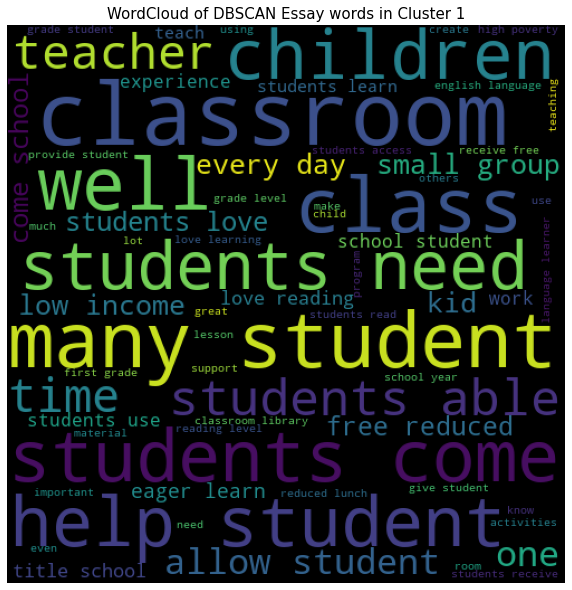

In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500,
                      background_color ='black',
                      min_font_size = 10).generate(cluster1_essays_words_dbscan)
# plot the WordCloud image

plt.figure(figsize = (8, 8))
print("="*90)
print("="*90)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('WordCloud of DBSCAN Essay words in Cluster 1', fontsize=15)

plt.tight_layout(pad = 0)
plt.show()




### 5.6 Manual Representation of Essays words After Applying DBSCAN Clustering on TFIDF set 3  </h2>

In [0]:
print("="*100)
print("-"*100)
print("Cluster 1 Words DBSCAN from Essays:")
print("-"*100)
print(cluster1_essays_words_dbscan[0:100])
print(cluster1_essays_words_dbscan[101:201])
print("="*100)


----------------------------------------------------------------------------------------------------
Cluster 1 Words DBSCAN from Essays:
----------------------------------------------------------------------------------------------------
 students full life energy thirst learn come classroom eager smiles faces prepared learn day hope st
dents go home happy school learn something new every day students come rural community many students


## 6 Conslusion </h2>

In [0]:
#!/usr/bin/python3

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Sr No.","Clustering Model ", "Hyperparameter 1","Hyperparameter 2","No of Clusters"]

x.add_row(["1","KMeans",  "Best K= 6","----","6"])
x.add_row(["2","Agglomerative","n_clusters=2","----","2"])
x.add_row(["3","Agglomerative","n_clusters=5","----","5"])
x.add_row(["3","DBSCAN","eps=2.2","min_samples=10000","1"])

print(x)

+--------+-------------------+------------------+-------------------+----------------+
| Sr No. | Clustering Model  | Hyperparameter 1 |  Hyperparameter 2 | No of Clusters |
+--------+-------------------+------------------+-------------------+----------------+
|   1    |       KMeans      |    Best K= 6     |        ----       |       6        |
|   2    |   Agglomerative   |   n_clusters=2   |        ----       |       2        |
|   3    |   Agglomerative   |   n_clusters=5   |        ----       |       5        |
|   3    |       DBSCAN      |     eps=2.2      | min_samples=10000 |       1        |
+--------+-------------------+------------------+-------------------+----------------+
